In [1]:
!pip install tf_bodypix tfjs_graph_converter

  Using cached tensorflow_hub-0.12.0-py2.py3-none-any.whl (108 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.36.1
    Uninstalling grpcio-1.36.1:
      Successfully uninstalled grpcio-1.36.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247


In [5]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths
import cv2
from matplotlib import pyplot as plt
import numpy as np

## Detection

In [6]:
# download the model
bodypix_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

we will now grab the webcame with opencv. By running the code below, you will be able to see the effect of bodypix model. Play around with the threshold value. you will see that with higher threshold, say, 0.7, the model will often ignore the hands when you try to show them in the cam

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # BodyPix detections
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.3).numpy().astype(np.uint8) #threshold is the confidence level we want
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    #show result 
    cv2.imshow('BodyPix', masked_image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

## Add Virtual Background

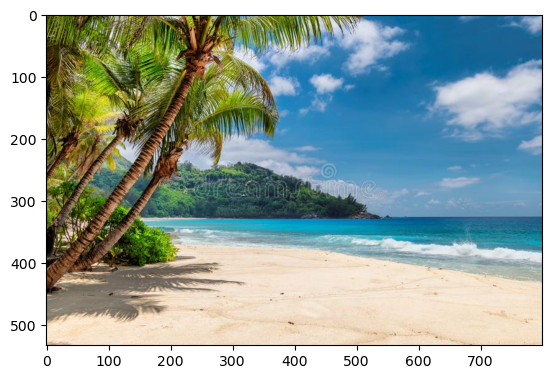

In [10]:
img = cv2.imread('beach.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

we need to adapt image shape to our frame webcame shape

In [11]:
img.shape

(533, 800, 3)

In [14]:
frame.shape

(480, 640, 3)

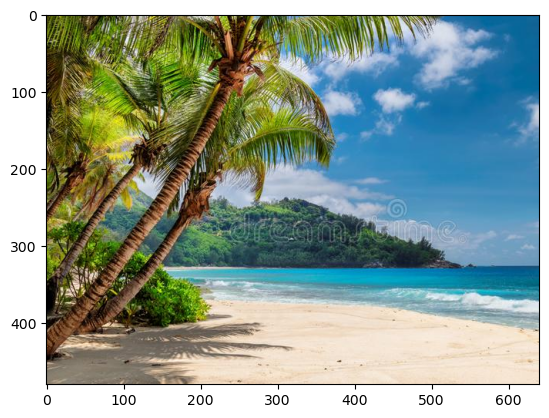

In [16]:
img = cv2.imread('beach.jpg')
img = img[:480, :640, :]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # BodyPix detections
    result = bodypix_model.predict_single(frame)
    mask = result.get_mask(threshold=0.6).numpy().astype(np.uint8) #threshold is the confidence level we want
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    #apply virtual background
    neg = np.add(mask, -1)
    inverse = np.where(neg==-1, 1, neg).astype(np.uint8)
    masked_background = cv2.bitwise_and(img, img, mask=inverse)
    final = cv2.add(masked_image, masked_background)
    
    #show result 
    cv2.imshow('BodyPix', final)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()